In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
plt.style.use("plot_style.mplstyle")

In [2]:
interleaver_mc = pd.read_csv("gf_interleaver_loss_monte_carlo_glob_v1040_20240130.csv")
psrnit_mc = pd.read_csv("gf_psrnit_loss_monte_carlo_glob_v1040_20240130.csv")

## Interleaver

In [3]:
interleaver_mc.columns

Index(['mcparamset ', 'leafValue( IL1_at_min "temperature" 10 )',
       'leafValue( IL1_at_min "temperature" 25 )',
       'leafValue( IL1_at_min "temperature" 105 )',
       'leafValue( IL2_at_min "temperature" 10 )',
       'leafValue( IL2_at_min "temperature" 25 )',
       'leafValue( IL2_at_min "temperature" 105 )',
       'leafValue( IL3_at_min "temperature" 10 )',
       'leafValue( IL3_at_min "temperature" 25 )',
       'leafValue( IL3_at_min "temperature" 105 )',
       'leafValue( IL4_at_min "temperature" 10 )',
       'leafValue( IL4_at_min "temperature" 25 )',
       'leafValue( IL4_at_min "temperature" 105 )'],
      dtype='object')

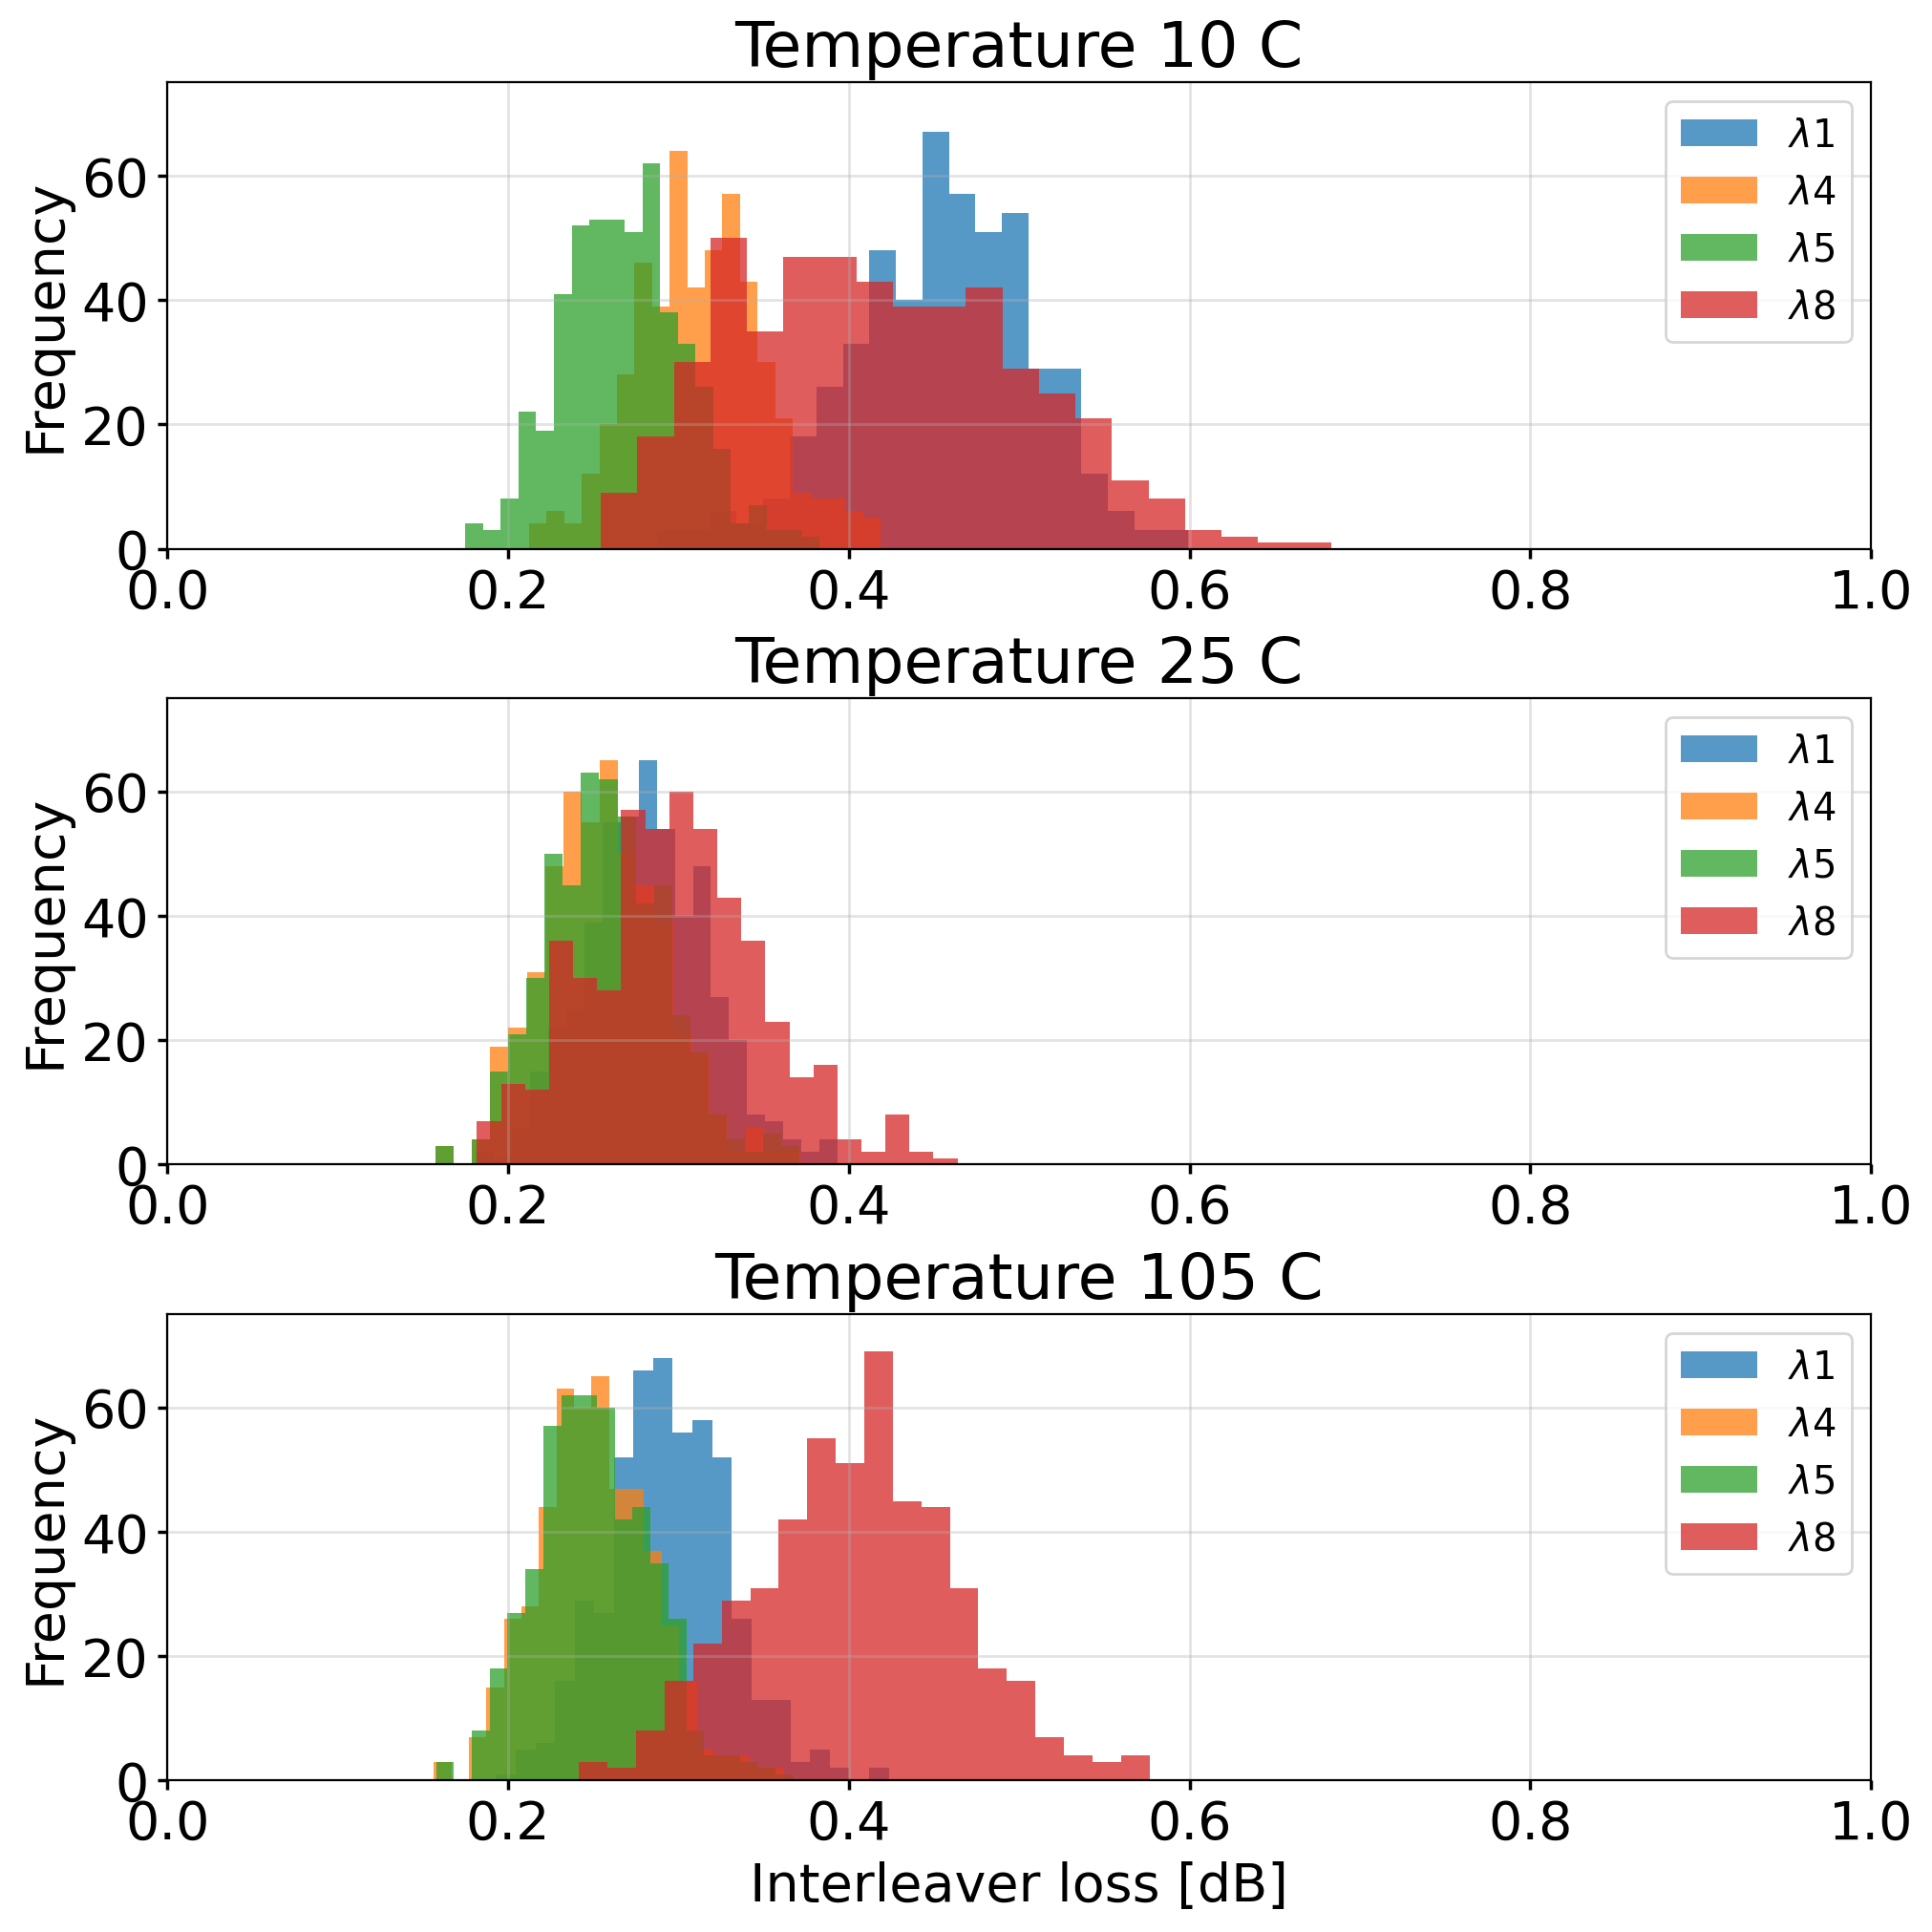

In [4]:
plt.figure(figsize=(10,10))
for idd_temperature, temperature in enumerate([10, 25, 105]):
  plt.subplot(3,1,idd_temperature+1)
  plt.hist(interleaver_mc[f'leafValue( IL1_at_min "temperature" {temperature} )'], alpha=0.75, label=r'$\lambda$1', bins=20)
  plt.hist(interleaver_mc[f'leafValue( IL2_at_min "temperature" {temperature} )'], alpha=0.75, label=r'$\lambda$4', bins=20)
  plt.hist(interleaver_mc[f'leafValue( IL3_at_min "temperature" {temperature} )'], alpha=0.75, label=r'$\lambda$5', bins=20)
  plt.hist(interleaver_mc[f'leafValue( IL4_at_min "temperature" {temperature} )'], alpha=0.75, label=r'$\lambda$8', bins=20)
  plt.legend()
  plt.title(f"Temperature {temperature} C")
  if idd_temperature == 2:
    plt.xlabel("Interleaver loss [dB]")
  plt.ylabel("Frequency")
  plt.xlim([0,1.0])
  plt.ylim([0, 75])
plt.savefig("interleaver_loss_monte_carlo_glob_v1040_20240130.png", dpi=600)

## Polarization Controller

In [5]:
psrnit_mc.columns

Index(['Point', 'Corner', 'temperature', 'mc_iteration', 'Pass/Fail',
       'fTEloss', 'fTETExtalk', 'fTETMxtalk', 'fTMloss', 'fTMTMxtalk',
       'fTMTExtalk', 'rTMloss', 'rTETExtalk', 'rTETMxtalk', 'rTEloss',
       'rTMTExtalk', 'rTMTMxtalk'],
      dtype='object')

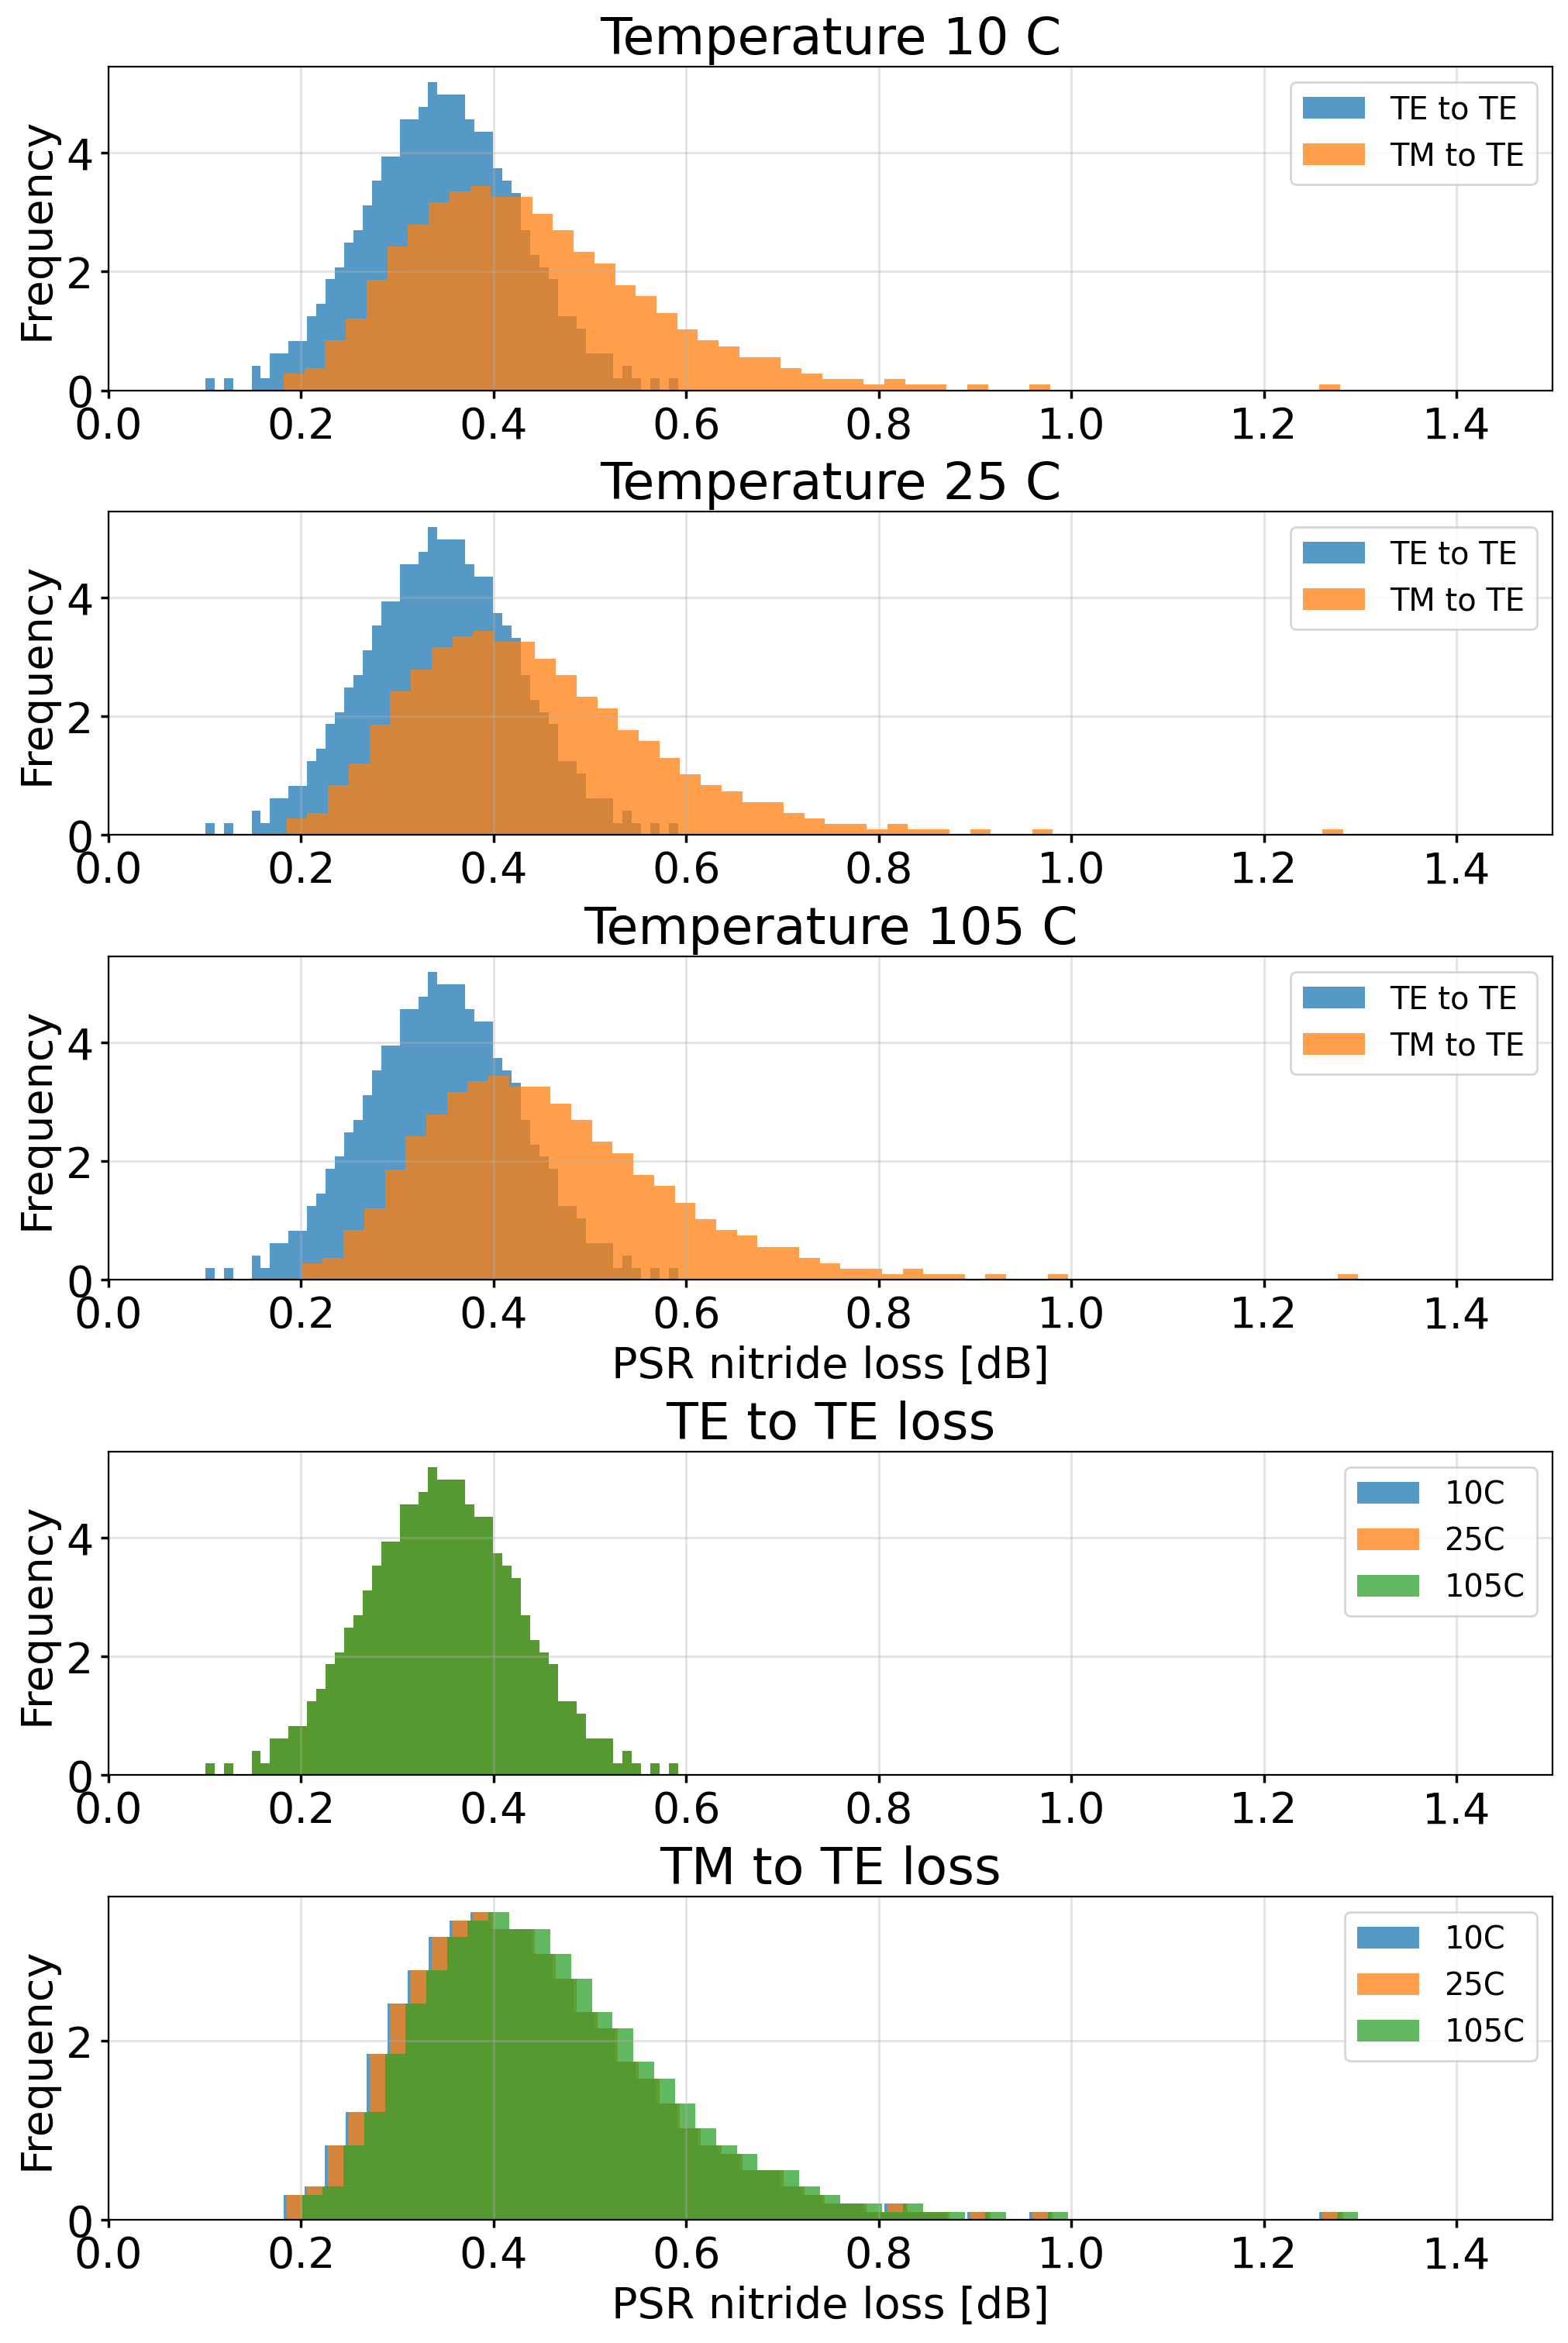

In [11]:
plt.figure(figsize=(10,15))
for idd_temperature, temperature in enumerate([10, 25, 105]):
  plt.subplot(5,1,idd_temperature+1)
  psrnit_mc_temp = psrnit_mc[psrnit_mc['temperature'] == temperature]
  plt.hist(-psrnit_mc_temp[f'fTEloss'], alpha=0.75, label='TE to TE', bins=51, density = True)
  plt.hist(-psrnit_mc_temp[f'fTMloss'], alpha=0.75, label='TM to TE', bins=51, density = True)
  plt.legend()
  plt.title(f"Temperature {temperature} C")
  if idd_temperature == 2:
    plt.xlabel("PSR nitride loss [dB]")
  plt.ylabel("Frequency")
  plt.xlim([0,1.5])
# plt.ylim([0, 100])

for idd_temperature, temperature in enumerate([10, 25, 105]):
  plt.subplot(5,1,4)
  psrnit_mc_temp = psrnit_mc[psrnit_mc['temperature'] == temperature]
  plt.hist(-psrnit_mc_temp[f'fTEloss'], alpha=0.75, label=f'{temperature}C', bins=51, density = True)
  plt.legend()
  plt.title(f"TE to TE loss")
  plt.ylabel("Frequency")
  plt.xlim([0,1.5])
  # plt.ylim([0, 100])
  plt.subplot(5,1,5)
  plt.hist(-psrnit_mc_temp[f'fTMloss'], alpha=0.75, label=f'{temperature}C', bins=51, density = True)
  plt.legend()
  plt.title(f"TM to TE loss")
  plt.xlabel("PSR nitride loss [dB]")
  plt.ylabel("Frequency")
  plt.xlim([0,1.5])
  # plt.ylim([0, 100])
plt.savefig("psrnit_loss_monte_carlo_glob_v1040_20240130.png", dpi=600)